<h2 style="color: green">Testing Extracted Features w/ Keras</h2>
Author: (Afif Al Mamun)[https://afifaniks.github.io]<br>
Date: August 23, 2019

In [1]:
import keras
from keras.models import Sequential
from keras.regularizers import l2, l1
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sn

Using TensorFlow backend.


In [2]:
df = pd.read_csv('dataset.csv', encoding='latin-1')
pd.options.display.max_columns=None
df.head(2)

,file_name,zero_crossing,spectral_centroid,spectral_rolloff,spectral_bandwidth,chroma_frequency,rmse,delta,melspectogram,tempo,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,label
0,(Tomake Paowa) - Hridoy Khan & Tasnim Anika F...,125424,1770.889394,3893.575094,2414.810615,0.315795,0.222552,-7.661680e-08,12.977708,172.265625,-107.906257,116.494382,23.320857,17.535451,9.382846,6.854393,-0.293704,-0.007064,-7.914926,1.532803,-5.300817,3.164991,-3.867179,5.325016,1.176338,-0.788755,-6.343288,2.488148,0.047027,7.211918,adhunik
1,008. Jai Bole Jete Naire - Jewel (1980).mp3,308658,2549.349989,4986.658880,2193.617981,0.310113,0.156930,8.893313e-08,5.118271,143.554688,-68.452095,81.151777,-35.804154,44.550898,-17.021686,18.244996,-18.741383,12.376125,-16.116041,8.450346,-11.745541,8.358729,-12.691169,11.393858,-6.176215,9.947330,-6.987708,7.935905,-9.452455,1.582699,adhunik


# Data Visualization

nazrul        312
rabindra      297
band          295
hiphop        295
adhunik       283
palligeeti    260
Name: label, dtype: int64


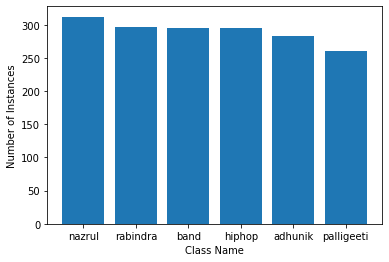

In [3]:
X = df['label'].value_counts()

classes = X.keys()

label = {}

for c in classes:
    label[c] = X[c]

plt.bar(label.keys(), label.values())
plt.xlabel('Class Name')
plt.ylabel('Number of Instances')

print(X)

In [4]:
import numpy as np

In [5]:
data_adhunik = df[df['label'] == 'adhunik']
data_band = df[df['label'] == 'band']
data_hiphop = df[df['label'] == 'hiphop']
data_nazrul = df[df['label'] == 'nazrul']
data_palligeeti = df[df['label'] == 'palligeeti']
data_rabindra = df[df['label'] == 'rabindra']

In [6]:
data_list = [data_adhunik, data_band, data_hiphop, data_nazrul, data_palligeeti, data_rabindra]
classes = np.array(['adhunik', 'band', 'hiphop', 'nazrul', 'palligeeti', 'rabindra'])

zero_crossing
179833.67137809188
275995.7152542373
225064.01016949152
184407.72435897434
261663.73846153845
169258.16498316498


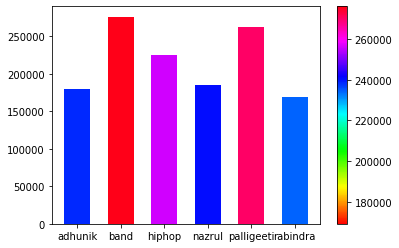

In [7]:
# Zero Crossings Visualization
col_name = 'zero_crossing'
print(col_name)
y = []
for data in data_list:
    print(data[col_name].mean())
    y.append(data[col_name].mean())
y = np.array(y)
colors = cm.hsv(y / float(max(y)))
plot = plt.scatter(y, y, c = y, cmap = 'hsv')
plt.clf()
plt.colorbar(plot)
plt.bar(classes, y, color = colors, width=0.6)
plt.show()

spectral_centroid
2004.755221108732
2585.1004981981914
2436.973775151505
1363.5994732748848
2233.453301876838
1536.5376533372362


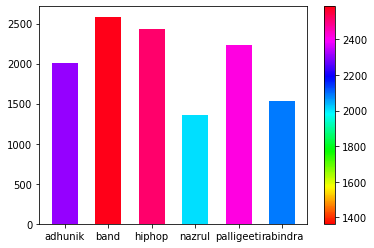

In [8]:
# Spectral Centroid Visualization
col_name = 'spectral_centroid'
print(col_name)
y = []
for data in data_list:
    print(data[col_name].mean())
    y.append(data[col_name].mean())
y = np.array(y)
colors = cm.hsv(y / float(max(y)))
plot = plt.scatter(y, y, c = y, cmap = 'hsv')
plt.clf()
plt.colorbar(plot)
plt.bar(classes, y, color = colors, width=0.6)
plt.show()

spectral_rolloff
4313.329030219406
5396.123389211625
5194.412510907178
2449.7371480025135
4414.39211426174
2983.1727724146535


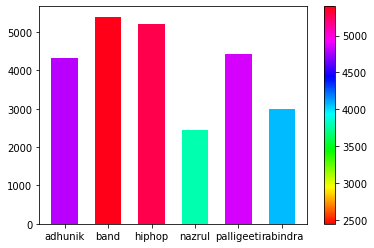

In [9]:
# Spectral Rolloff Visualization
col_name = 'spectral_rolloff'
print(col_name)
y = []
for data in data_list:
    print(data[col_name].mean())
    y.append(data[col_name].mean())
y = np.array(y)
colors = cm.hsv(y / float(max(y)))
plot = plt.scatter(y, y, c = y, cmap = 'hsv')
plt.clf()
plt.colorbar(plot)
plt.bar(classes, y, color = colors, width=0.6)
plt.show()

spectral_bandwidth
2326.1618148804455
2513.215376382651
2512.7762357336333
1236.3016089670282
2111.88097648089
1629.9497009604122


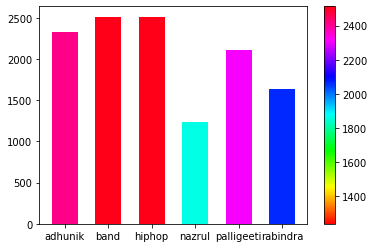

In [10]:
# Spectral Bandwidth Visualization
col_name = 'spectral_bandwidth'
print(col_name)
y = []
for data in data_list:
    print(data[col_name].mean())
    y.append(data[col_name].mean())
y = np.array(y)
colors = cm.hsv(y / float(max(y)))
plot = plt.scatter(y, y, c = y, cmap = 'hsv')
plt.clf()
plt.colorbar(plot)
plt.bar(classes, y, color = colors, width=0.6)
plt.show()

chroma_frequency
0.31287358583951597
0.35978639505996607
0.3888264347954499
0.2385208801594986
0.2837889299683471
0.25048065993487884


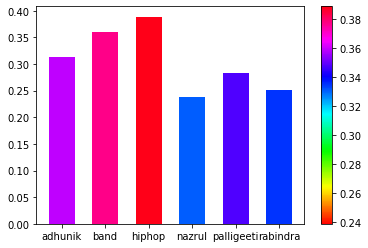

In [11]:
# Chroma Frequency Visualization
col_name = 'chroma_frequency'
print(col_name)
y = []
for data in data_list:
    print(data[col_name].mean())
    y.append(data[col_name].mean())
y = np.array(y)
colors = cm.hsv(y / float(max(y)))
plot = plt.scatter(y, y, c = y, cmap = 'hsv')
plt.clf()
plt.colorbar(plot)
plt.bar(classes, y, color = colors, width=0.6)
plt.show()

tempo
119.84027513127766
127.02895567930297
112.95735878442223
124.15518484953725
125.12835234826758
129.56600392149448


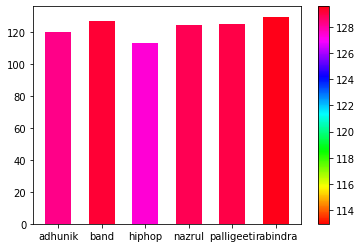

In [12]:
# Tempo Visualization
col_name = 'tempo'
print(col_name)
y = []
for data in data_list:
    print(data[col_name].mean())
    y.append(data[col_name].mean())
y = np.array(y)
colors = cm.hsv(y / float(max(y)))
plot = plt.scatter(y, y, c = y, cmap = 'hsv')
plt.clf()
plt.colorbar(plot)
plt.bar(classes, y, color = colors, width=0.6)
plt.show()

zero_crossing
179833.67137809188
275995.7152542373
225064.01016949152
184407.72435897434
261663.73846153845
169258.16498316498


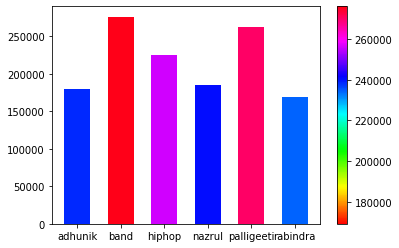

In [13]:
# Zero Crossings Visualization
col_name = 'zero_crossing'
print(col_name)
y = []
for data in data_list:
    print(data[col_name].mean())
    y.append(data[col_name].mean())
y = np.array(y)
colors = cm.hsv(y / float(max(y)))
plot = plt.scatter(y, y, c = y, cmap = 'hsv')
plt.clf()
plt.colorbar(plot)
plt.bar(classes, y, color = colors, width=0.6)
plt.show()

rmse
0.1754621670010599
0.16074368868813577
0.20779618672881348
0.17412291010576922
0.169135676623077
0.14150188897643104


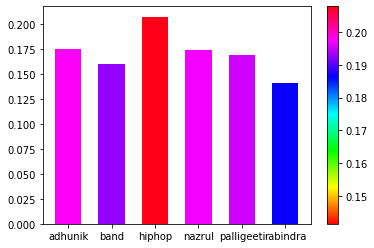

In [14]:
# RMSE Visualization
col_name = 'rmse'
print(col_name)
y = []
for data in data_list:
    print(data[col_name].mean())
    y.append(data[col_name].mean())
y = np.array(y)
colors = cm.hsv(y / float(max(y)))
plot = plt.scatter(y, y, c = y, cmap = 'hsv')
plt.clf()
plt.colorbar(plot)
plt.bar(classes, y, color = colors, width=0.6)
plt.show()

# Preparing Data

In [15]:
# Splitting data
y = df['label']
X = df.drop(['file_name', 'label'], axis=1)

# Scaling values by normal distribution
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) #4

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [16]:
encoder.classes_

array(['adhunik', 'band', 'hiphop', 'nazrul', 'palligeeti', 'rabindra'],
      dtype=object)

In [17]:
encoder.inverse_transform([0, 1, 2, 3, 4, 5])

array(['adhunik', 'band', 'hiphop', 'nazrul', 'palligeeti', 'rabindra'],
      dtype=object)

In [18]:
print(X_train.shape, X_test.shape)

(1393, 29) (349, 29)


# Model Training

In [19]:
# Creating model
model = Sequential()
model.name="Bangla Music Genre Classifier"
model.add(Dense(256, activation='relu', input_dim=29, name="First_Layer", kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.002)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', name="Second_Layer", kernel_regularizer=l2(0.002), bias_regularizer=l2(0.0001)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', name="Third_Layer", kernel_regularizer=l1(0.002), bias_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', name="Fourth_Layer", kernel_regularizer=l2(0.001), bias_regularizer=l2(0.0001)))
model.add(Dropout(0.4))
model.add(Dense(6, activation='softmax', name="Output_Layer", kernel_regularizer=l2(0.001), bias_regularizer=l2(0.002)))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "Bangla Music Genre Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
First_Layer (Dense)          (None, 256)               7680      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
Second_Layer (Dense)         (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
Third_Layer (Dense)          (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
______________________

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=200, validation_data=(X_test, y_test), validation_split=0.2, epochs=100)


Train on 1393 samples, validate on 349 samples
Epoch 1/100
1393/1393 [==============================] - 1s 383us/step - loss: 3.6833 - accuracy: 0.1888 - val_loss: 3.5251 - val_accuracy: 0.3352
Epoch 2/100
1393/1393 [==============================] - 0s 52us/step - loss: 3.5392 - accuracy: 0.2297 - val_loss: 3.4086 - val_accuracy: 0.4069
Epoch 3/100
1393/1393 [==============================] - 0s 47us/step - loss: 3.4101 - accuracy: 0.2735 - val_loss: 3.2806 - val_accuracy: 0.4069
Epoch 4/100
1393/1393 [==============================] - 0s 48us/step - loss: 3.3142 - accuracy: 0.2893 - val_loss: 3.1548 - val_accuracy: 0.4011
Epoch 5/100
1393/1393 [==============================] - 0s 65us/step - loss: 3.1878 - accuracy: 0.3338 - val_loss: 3.0295 - val_accuracy: 0.4298
Epoch 6/100
1393/1393 [==============================] - 0s 51us/step - loss: 3.1081 - accuracy: 0.3374 - val_loss: 2.9114 - val_accuracy: 0.4441
Epoch 7/100
1393/1393 [==============================] - 0s 59us/step - los

1393/1393 [==============================] - 0s 44us/step - loss: 1.1698 - accuracy: 0.6971 - val_loss: 1.1320 - val_accuracy: 0.6848
Epoch 56/100
1393/1393 [==============================] - 0s 44us/step - loss: 1.1618 - accuracy: 0.6971 - val_loss: 1.1340 - val_accuracy: 0.6934
Epoch 57/100
1393/1393 [==============================] - 0s 43us/step - loss: 1.1224 - accuracy: 0.7143 - val_loss: 1.1244 - val_accuracy: 0.6991
Epoch 58/100
1393/1393 [==============================] - 0s 47us/step - loss: 1.1400 - accuracy: 0.7064 - val_loss: 1.1227 - val_accuracy: 0.6877
Epoch 59/100
1393/1393 [==============================] - 0s 48us/step - loss: 1.1278 - accuracy: 0.6971 - val_loss: 1.1206 - val_accuracy: 0.6905
Epoch 60/100
1393/1393 [==============================] - 0s 49us/step - loss: 1.1345 - accuracy: 0.7071 - val_loss: 1.1098 - val_accuracy: 0.7020
Epoch 61/100
1393/1393 [==============================] - 0s 50us/step - loss: 1.1085 - accuracy: 0.7193 - val_loss: 1.1059 - val_a

In [21]:
y_predict = model.predict_classes(X_test)
y_predict

array([5, 2, 4, 3, 1, 3, 3, 3, 3, 1, 5, 3, 0, 0, 1, 4, 5, 0, 0, 5, 0, 1,
       2, 4, 2, 5, 5, 2, 3, 0, 2, 0, 5, 0, 3, 1, 2, 4, 2, 4, 3, 4, 4, 1,
       4, 2, 3, 2, 1, 5, 0, 4, 4, 3, 1, 0, 5, 2, 2, 2, 2, 5, 1, 3, 2, 2,
       5, 5, 2, 4, 3, 3, 0, 5, 1, 3, 3, 5, 2, 2, 4, 1, 5, 3, 2, 3, 3, 1,
       5, 1, 2, 0, 4, 4, 2, 0, 2, 3, 5, 1, 0, 2, 2, 5, 4, 3, 3, 0, 5, 4,
       2, 0, 1, 0, 1, 5, 0, 0, 5, 2, 0, 5, 3, 5, 3, 0, 5, 3, 4, 1, 4, 5,
       3, 2, 5, 0, 3, 3, 3, 3, 2, 0, 2, 1, 4, 3, 2, 1, 2, 0, 2, 1, 4, 2,
       5, 4, 0, 1, 2, 1, 5, 3, 0, 5, 5, 1, 4, 3, 2, 1, 4, 1, 4, 4, 5, 0,
       2, 1, 0, 1, 2, 4, 2, 4, 1, 4, 3, 3, 4, 5, 2, 3, 3, 1, 1, 3, 4, 4,
       4, 4, 0, 5, 5, 0, 5, 2, 3, 0, 5, 3, 0, 5, 4, 2, 0, 2, 0, 3, 5, 3,
       2, 0, 5, 4, 5, 5, 1, 1, 5, 3, 5, 1, 5, 3, 1, 0, 4, 5, 2, 3, 3, 4,
       5, 1, 4, 4, 0, 5, 0, 1, 2, 2, 3, 1, 0, 5, 0, 2, 2, 1, 4, 5, 4, 3,
       1, 2, 5, 5, 3, 2, 3, 3, 1, 5, 4, 2, 1, 0, 1, 3, 0, 1, 0, 0, 3, 2,
       1, 0, 2, 3, 1, 2, 2, 4, 2, 2, 5, 0, 2, 5, 3,

In [22]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [23]:
score, acc = model.evaluate(X_test, y_test)
print(score, acc)

349/349 [==============================] - 0s 52us/step
1.024580137948252 0.7220630645751953


# Visualization

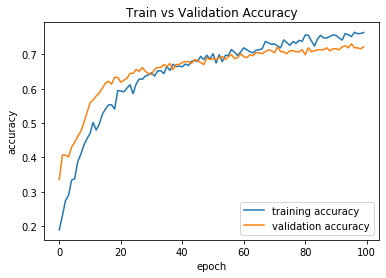

In [24]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Train vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
plt.show()

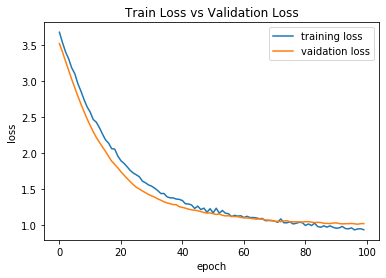

In [25]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train Loss vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'vaidation loss'], loc='upper right')
plt.show()

In [26]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

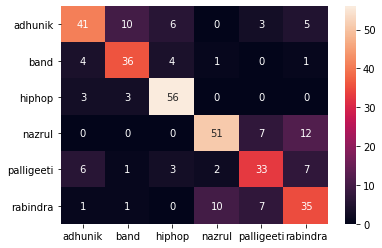

In [27]:
# Confusion Matrix
con_mat = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(con_mat, columns=encoder.classes_, index=encoder.classes_)
sn.heatmap(df_cm, annot=True)

In [28]:
print(classification_report(y_test, y_predict, target_names=encoder.classes_))

              precision    recall  f1-score   support

     adhunik       0.75      0.63      0.68        65
        band       0.71      0.78      0.74        46
      hiphop       0.81      0.90      0.85        62
      nazrul       0.80      0.73      0.76        70
  palligeeti       0.66      0.63      0.65        52
    rabindra       0.58      0.65      0.61        54

    accuracy                           0.72       349
   macro avg       0.72      0.72      0.72       349
weighted avg       0.72      0.72      0.72       349



In [29]:
false = 0
true = 0
for i in range(len(y_predict)):
    if y_predict[i] == y_test[i]:
        true += 1
    else:
        false += 1
print('Total: ', false + true, 'True: ', true, 'False: ', false)

Total:  349 True:  252 False:  97
